In [1]:
import sys 
sys.path.append('C:\\Users\\Nuo.Chen\\PycharmProjects\\Imbalance_price_forecast')
from utils.import_packages import *

In [2]:
train = pd.read_csv(data_folder_path + '/train.csv')
test = pd.read_csv(data_folder_path + '/test.csv')

In [3]:
len(train)/len(test)

2.329000474833808

# simple_plot

In [4]:
# plt.plot( validate.iloc[:96]['PTE'], validate.iloc[:96]['imbalance_kWhPTE'])
# plt.xlabel('Date')
# plt.ylabel('Imbalance volume')
# plt.title('System imbalance volume day distribution')
# plt.grid(color = 'k', alpha = 0.4)

# cross-validation

In [5]:
model_para_dict = {'n_estimators':20,'max_features':0.5,'n_jobs':-1}
feat_para_dict = {'lags':[96,97,98], 'target':'imbalance_kWhPTE'}

out,feat_cols = cross_validation(RandomForestRegressor,model_para_dict,\
                                 feat_para_dict, train, print_temp_info = True)


train_score:88.317232241123, test_score:-1.8294511985978978
 
train_score:87.4056385829203, test_score:-1.783787600733877
 
train_score:86.8621397404078, test_score:-4.850016497901266
 
train_score:86.1993503577017, test_score:-3.3740329407895286
 
train_score:85.82128991232263, test_score:-0.5239166648335569
 
cross validation is done
train_score = 86.92113016689508, test_score = -2.4722409805712253


# plot feature importance

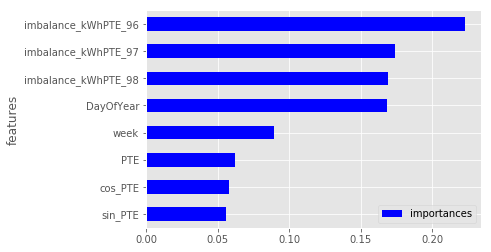

In [6]:
test_scores = out['test_scores']
best_model = out['models'][test_scores.index(max(test_scores))]

_ = plot_feature_importance(best_model, feat_cols)

# test accuracy

In [7]:
feat_para_dict['df'] = test
test_x, test_y = make_feat_pipeline(**feat_para_dict)

In [8]:
prediction = best_model.predict(test_x)

In [23]:
results = pd.DataFrame()
results.loc[:, 'predictions'] = prediction
results.loc[:, 'true_values'] = test_y
results['MAPE'] = abs(results['predictions'] - results['true_values'])/results['true_values']

MAPE = np.sum(results['MAPE'])/len(results)
print('MAPE = {}%'.format(MAE * 100))

MAPE = 3616757.0409694766%


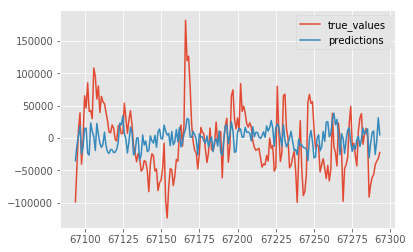

In [27]:
def plot_last_200_predictions(results):
    
    selected_data = results.iloc[-200:, :]
    f,a = plt.subplots()
    selected_data.plot(ax=a, y='true_values')
    selected_data.plot(ax=a, y='predictions')
    
    return f

_ = plot_last_200_predictions(results)